<a href="https://colab.research.google.com/github/roman-mikhaylov/repo_sinergiya/blob/main/ML_5_12_Mikhaylov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

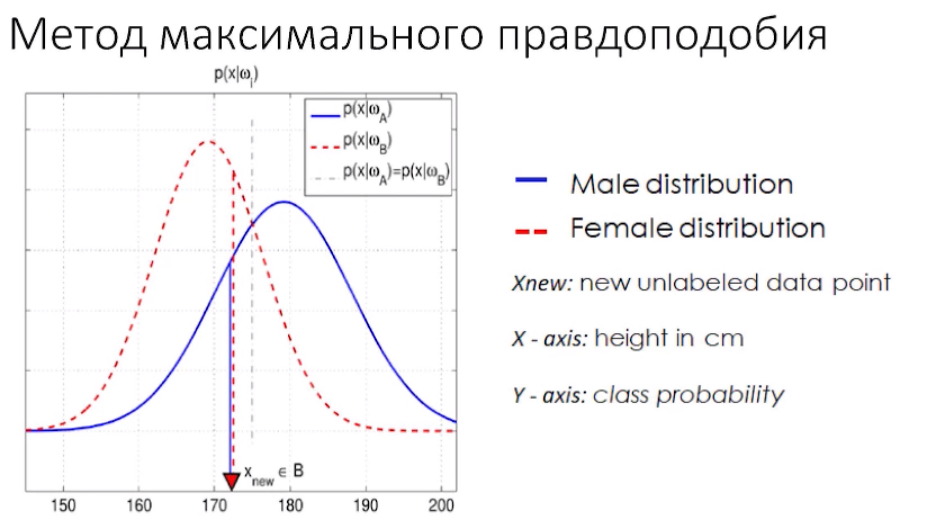

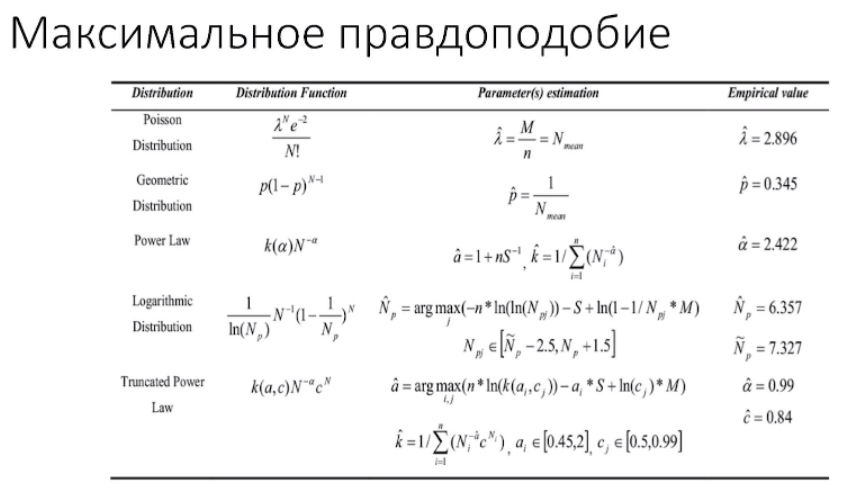

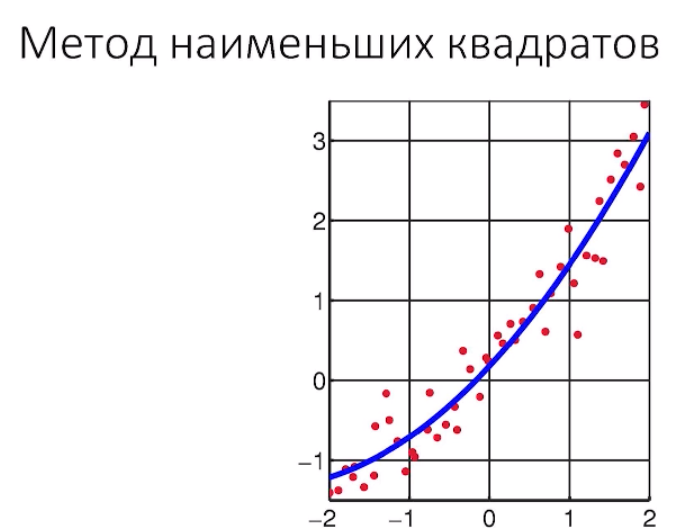

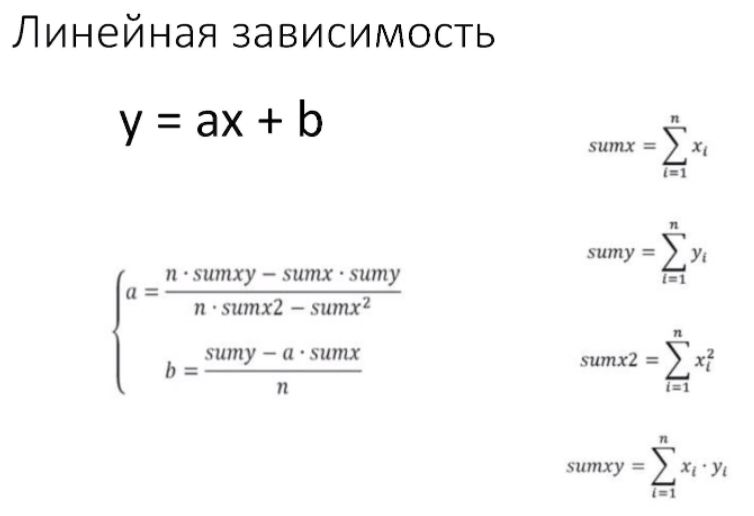

**практикум**
зависимость энергопортебления от теммпратуры


In [2]:
import numpy as np
import pandas as pd

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/energy_2.csv')
print(data.head())

             timestamp  meter_reading  air_temperature  cloud_coverage  \
0  2016-01-30 08:00:00        43.6839              8.3             0.0   
1  2016-01-31 05:00:00        37.5408             12.8             0.0   
2  2016-01-31 17:00:00        52.5571             20.6             0.0   
3  2016-04-08 14:00:00        59.3827             21.7             2.0   
4  2016-05-01 19:00:00       448.0000             31.1             0.0   

   dew_temperature  precip_depth_1_hr  sea_level_pressure  wind_speed  \
0              6.1                0.0              1019.0         2.1   
1             10.0                0.0              1021.9         0.0   
2             11.7                0.0              1020.9         1.5   
3             14.4                0.0              1015.1         3.1   
4             17.2                0.0              1016.1         4.1   

   air_temperature1  wind_direction_sin  wind_direction_cos  hour  
0              -2.3           -0.642788         

**Коэффициенты МНК**

строим линейную зависимость энергопотребления от темпратуры воздуха

In [9]:
n = len(data)
sumx = np.sum(data['air_temperature'])
sumy = np.sum(data['meter_reading'])
sumx2 = np.sum(data['air_temperature']*data['air_temperature'])
sumxy = np.sum(data['air_temperature']*data['meter_reading'])
a = ((n)*sumxy-sumx*sumy) / (n*sumx2-sumx**2)
b = ((sumy-a*sumx) / n)
print('y=', a, '*x +', b)

y= 4.899752437740383 *x + 115.41948678647792


**Ошибка модели**

Расчитаем RMSLE линейной модели по тепературе, ансамбль по часам дает 0.25

In [10]:
err_rmsle = (np.log(1 + data['meter_reading']) - np.log(1 + a * data['air_temperature'] + b))**2
print ('RMSLE: {0:.5}'. format(np.array(err_rmsle).mean()**0.5))

RMSLE: 0.2228


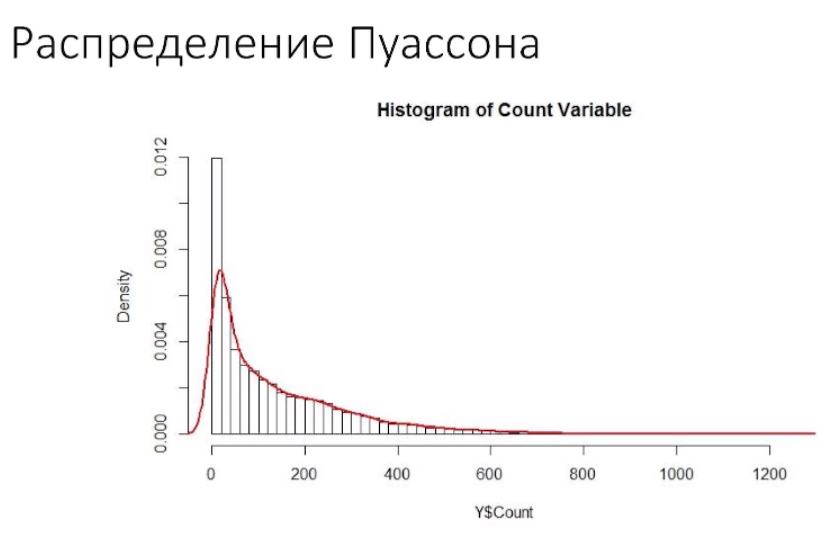

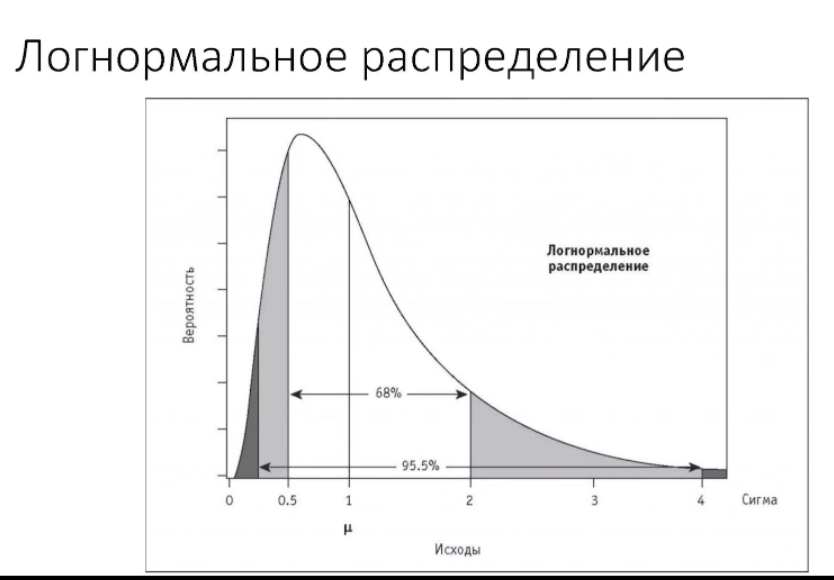

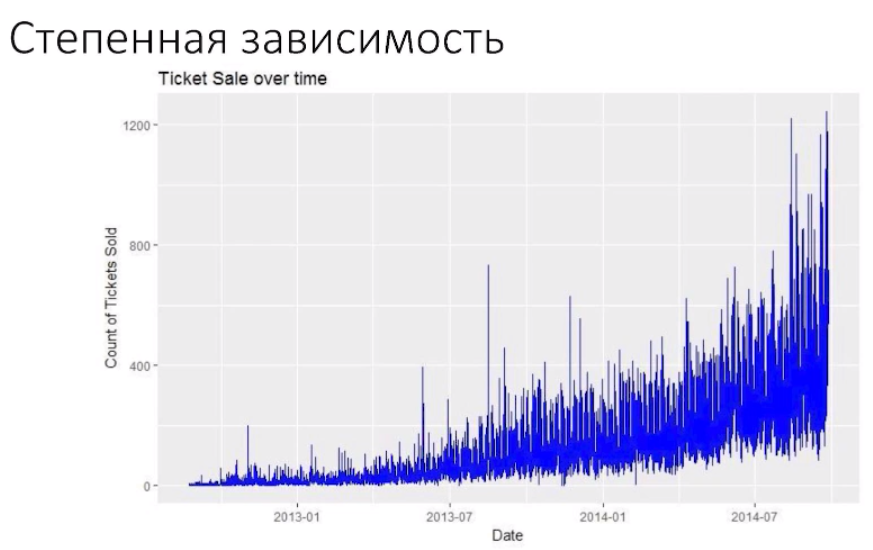

**Задание**

1.Опишите суть метода максимального правдоподобия

Метод максимального правдоподобия используется для оценки параметров вероятностных моделей на основе имеющихся данных. Суть метода заключается в том, что из всех возможных значений параметров выбирается то, при котором наблюдаемые данные имеют максимальную вероятность.

То есть мы ищем такие значения параметров, которые делают наблюдаемые данные наиболее “вероятными”. Для этого мы строим функцию правдоподобия, которая показывает, насколько вероятно получить наблюдаемые данные при заданных значениях параметров. Затем мы максимизируем эту функцию, подбирая оптимальные значения параметров.

2.Приведите пример максимального правдоподобия.

Пример из лекции: если в группе встретились 6 дувушек и 4 парня,  не зная сколько особей обего пола есть на планете, по методу максимального правдоподобия мы можем задать коэффиценты рапределеня полов как 60 на 40.

Пример другой: Предположим, что вы бросаете игральную кость много раз. Каждый бросок дает случайное число от 1 до 6. Мы можем считать, что результат каждого броска - это случайная величина, которая имеет равномерное распределение на множестве {1, 2, 3, 4, 5, 6}. Наша задача - оценить параметр этого распределения (вероятность выпадения каждого числа) по результатам наблюдений.

Функцией правдоподобия в этом случае будет L(x1, …, xn|p1, …, p6) = Π(p1^x1 * … * p6^xn), где xi - результат i-го броска, а pi - вероятность выпадения i-го числа.

Для нахождения оценок максимального правдоподобия мы должны максимизировать эту функцию по параметрам pi.

3.Дайте определение методу наименьших квадратов.

МНК - Метод наименьших квадратов (МНК) - это статистический метод, используемый для оценки параметров модели на основе имеющихся данных. Он заключается в минимизации суммы квадратов отклонений наблюдаемых значений от модельных значений, то есть в нахождении таких значений параметров, при которых ошибки модели будут наименьшими.

**задание спикера**

построить 24 модели по часам


In [17]:
ensamble = []
for h in range(24):
  data1 =  data.loc[data['hour'] == h]
  sumx = np.sum(data1['air_temperature'])
  sumy = np.sum(data1['meter_reading'])
  sumx2 = np.sum(data1['air_temperature']*data['air_temperature'])
  sumxy = np.sum(data1['air_temperature']*data['meter_reading'])
  a = ((n)*sumxy-sumx*sumy) / (n*sumx2-sumx**2)
  b = ((sumy-a*sumx) / n)
  model = (a,b)
  ensamble.append(model)
print (ensamble)

[(7.077597814946478, 59.72433116091778), (7.845968179930192, 47.89203280361337), (7.9660081423285485, 50.134830733020046), (7.718230216685666, 60.01893084806759), (7.50473168618791, 66.57096131005376), (7.21894257621155, 74.9079603709535), (6.971175158244995, 81.40869625714073), (7.143685201309394, 83.33371873076274), (7.156578888134145, 87.79207048410537), (6.766524394435302, 89.30262285251607), (7.278336173752246, 78.73850243560624), (7.954022607090598, 63.85024898597987), (7.649016165664692, 66.0227913249307), (7.9811749664458915, 47.655396207745326), (8.628674017451228, 16.323112134811495), (9.01174674335699, -7.422260995806169), (8.81660474195156, -12.172948964067295), (8.547517105810924, -12.769103720024578), (5.930034984746994, 63.09440976917055), (1.6387364245695188, 191.18334848694616), (3.5163307356461657, 135.5034033337625), (4.644195629431755, 105.78349673601772), (5.123812765054204, 97.66442230772518), (5.7703676225261695, 87.90712527607258)]


вычислить RMSLE для ансамбля линейных моделей

In [23]:
a = [x[0] for x in ensamble]
b = [x[1] for x in ensamble]

In [24]:
err_rmsle = []
for h in range(24):

  err_rmsle.extend(((np.log(1 + data['meter_reading']) - np.log(1 + a[h] * data['air_temperature'] + b[h]))**2).values)

  #err_rmsle.extend(((np.log(1+ensamble[h]) - np.log(1+data.loc[data['hour'] == h]['meter_reading']))**2).values)
print ('RMSLE: {0:.5}'. format(np.array(err_rmsle).mean()**0.5))

RMSLE: 0.24569
